In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import rfft, irfft
from scipy import signal
import sys, os
import json
sys.path.append(os.path.realpath('../../include'))
sys.path.append(os.path.realpath('/home/bfr/devel/github_mthotel/MTHotel/python/include'))
import json_header as jh

In [2]:
# open a data file with doubles
filename = '/home/bfr/devel/ats_data/three_fgs/indi/ts/S25f/meas_2017-04-17_07-34-36/295_ADU-07e_C001_R000_TEy_16s'


In [3]:
ch1 = jh.read_atssheader(filename)
ch2 = jh.read_atssheader(filename)


In [4]:
file1 = open(filename + ".atss", 'rb')
print("opening: ", filename + ".atss")
wl1 = 1024                                   # set a window length for plotting
# read wl
ex1 = np.fromfile(file1, dtype = np.float64, count = wl1)
ex1 = signal.detrend(ex1)
file1.close()

opening:  /home/bfr/devel/ats_data/three_fgs/indi/ts/S25f/meas_2017-04-17_07-34-36/295_ADU-07e_C001_R000_TEy_16s.atss


In [5]:
file2 = open(filename + ".atss", 'rb')
print("opening: ", filename + ".atss")
wl2 = 4096                                   # set a window length for plotting
# read wl
ex2 = np.fromfile(file2, dtype = np.float64, count = wl2)
ex2 = signal.detrend(ex2)
file2.close()

opening:  /home/bfr/devel/ats_data/three_fgs/indi/ts/S25f/meas_2017-04-17_07-34-36/295_ADU-07e_C001_R000_TEy_16s.atss


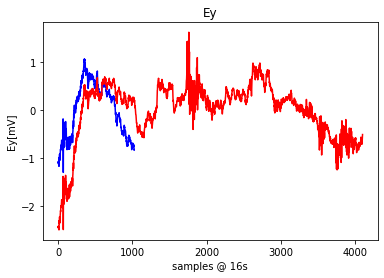

In [6]:
t1 = range(wl1) # x 
t2 = range(wl2) # x 
plt.title( ch1['channel_type'])       # title
plt.xlabel("samples @ " + jh.sample_rate_to_string(ch1['sample_rate']))
plt.ylabel(ch1['channel_type'] + "[mV]")
plt.plot(t1, ex1, c='b', label='data')
plt.plot(t2, ex2, c='r', label='data')
plt.draw()


In [7]:
window = np.hanning(wl1)
ex1spc = ex1 * window        
specex1 = rfft(ex1spc, norm="backward")   # that is numpy default which includes some normalisation
wincal = np.sqrt(1.0 / (0.5 * wl1 * 0.5))
specex1 *= wincal * 2.0                  # disagree with normalisation 
ampl_specex1 = abs(specex1)
ampl_specex1 = ampl_specex1[20:420]         # take not the complete data - gives better scale
ampl_freqex1 = np.linspace(20, 420, 400, endpoint=True)
ampl_freqex1 = ampl_freqex1 * ch1['sample_rate'] / wl1

In [8]:
window = np.hanning(wl2)
ex2spc = ex2 * window        
specex2 = rfft(ex2spc, norm="backward")   # that is numpy default which includes some normalisation
wincal = np.sqrt(1.0 / (0.5 * wl2 * 0.5))
specex2 *= wincal * 2.0                  # disagree with normalisation 
ampl_specex2 = abs(specex2)
ampl_specex2 = ampl_specex2[20:620]         # take not the complete data - gives better scale
ampl_freqex2 = np.linspace(20, 620, 600, endpoint=True)
ampl_freqex2 = ampl_freqex2 * ch2['sample_rate'] / wl2

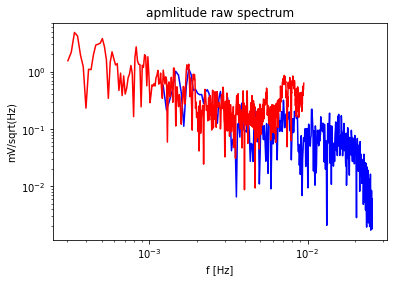

In [9]:
plt.title("apmlitude raw spectrum")      
plt.xlabel("f [Hz]")
plt.ylabel("mV/sqrt(Hz)")
plt.loglog(ampl_freqex1, ampl_specex1, c='b')
plt.loglog(ampl_freqex2, ampl_specex2, c='r')
plt.show()